In [3]:
from pathlib import Path
import pandas as pd

base_path = Path.cwd()
data_path = base_path / "sales_with_history_2020_2025.csv"
if not data_path.exists():
    data_path = base_path / "data" / "sales_with_history_2020_2025.csv"
sales_df = pd.read_csv(data_path)
sales_df.head()

,system_date,order_type,food_name,qty,gross_price,discount_rate,total_discount_price,total_price,discount_ratio_effective
0,2020-01-10,delivery,Sweet Pasta 12,5,6624.60,0.260369,3083.27,3541.33,NaN
1,2020-01-10,takeaway,Sweet Roll 9,4,2077.09,0.248330,711.30,1365.79,NaN
2,2020-01-11,delivery,Item50,1,3963.95,0.022974,1461.42,2502.53,NaN
3,2020-01-12,table,Crispy Pasta 12,1,1770.43,0.274482,17.70,1752.73,NaN
4,2020-01-12,table,Deluxe Pizza,4,1334.02,0.226195,324.49,1009.53,NaN


In [3]:
sales_df["system_date"].min(), sales_df["system_date"].max()

('2020-01-10', '2025-09-10')

In [ ]:
sales_df.shape

(7888, 9)

In [5]:
sales_df.columns

Index(['system_date', 'order_type', 'food_name', 'qty', 'gross_price',
       'discount_rate', 'total_discount_price', 'total_price',
       'discount_ratio_effective'],
      dtype='object')

In [4]:
sales_df = sales_df.copy()
sales_df["system_date"] = pd.to_datetime(sales_df["system_date"], errors="coerce")
sales_df["day_of_week"] = sales_df["system_date"].dt.dayofweek
sales_df["is_weekend"] = sales_df["day_of_week"].isin([5, 6]).astype("int8")
sales_df["month"] = sales_df["system_date"].dt.month
sales_df["year"] = sales_df["system_date"].dt.year
sales_df["is_month_start"] = sales_df["system_date"].dt.is_month_start.fillna(False).astype("int8")
sales_df["is_month_end"] = sales_df["system_date"].dt.is_month_end.fillna(False).astype("int8")
day_values = sales_df["system_date"].dt.day
sales_df["week_of_month"] = ((day_values - 1) // 7 + 1).astype("Int64")
preview_columns = ["system_date", "day_of_week", "is_weekend", "month", "year", "is_month_start", "is_month_end", "week_of_month"]
print(sales_df[preview_columns].head(10))

  system_date  day_of_week  is_weekend  month  year  is_month_start  \
0  2020-01-10            4           0      1  2020               0   
1  2020-01-10            4           0      1  2020               0   
2  2020-01-11            5           1      1  2020               0   
3  2020-01-12            6           1      1  2020               0   
4  2020-01-12            6           1      1  2020               0   
5  2020-01-13            0           0      1  2020               0   
6  2020-01-13            0           0      1  2020               0   
7  2020-01-13            0           0      1  2020               0   
8  2020-01-13            0           0      1  2020               0   
9  2020-01-13            0           0      1  2020               0   

   is_month_end  week_of_month  
0             0              2  
1             0              2  
2             0              2  
3             0              2  
4             0              2  
5             0     

In [15]:
# print the row where date is '2022-11-01'
sales_df[sales_df["system_date"] == "2022-11-02"]

,system_date,order_type,food_name,qty,gross_price,discount_rate,total_discount_price,total_price,discount_ratio_effective,day_of_week,is_weekend,month,year,is_month_start,is_month_end,week_of_month
3340,2022-11-02,delivery,Sweet Chicken 12,3,7154.75,0.500000,3635.07,3519.68,NaN,2,0,11,2022,0,0,1
3341,2022-11-02,delivery,Herb Pizza 9,3,3053.75,0.214247,633.06,2420.69,NaN,2,0,11,2022,0,0,1
3342,2022-11-02,delivery,Zesty Pasta 9,2,4500.93,0.000000,1580.59,2920.34,NaN,2,0,11,2022,0,0,1
3343,2022-11-02,table,Herb Chicken 12,2,3656.61,0.500000,2101.21,1555.40,NaN,2,0,11,2022,0,0,1


In [8]:
issues = {}
date_series = sales_df["system_date"]
expected_day_of_week = date_series.dt.dayofweek
expected_weekend = expected_day_of_week.isin([5, 6]).astype("int8")
expected_month = date_series.dt.month
expected_year = date_series.dt.year
expected_month_start = date_series.dt.is_month_start.fillna(False).astype("int8")
expected_month_end = date_series.dt.is_month_end.fillna(False).astype("int8")
expected_week_of_month = ((date_series.dt.day - 1) // 7 + 1).astype("Int64")
dow_mismatch_mask = ~sales_df["day_of_week"].fillna(-1).eq(expected_day_of_week.fillna(-1))
if dow_mismatch_mask.any():
    issues["day_of_week_mismatch"] = sales_df.loc[dow_mismatch_mask, ["system_date", "day_of_week"]].copy()
weekend_mismatch_mask = ~sales_df["is_weekend"].fillna(-1).eq(expected_weekend.fillna(-1))
if weekend_mismatch_mask.any():
    issues["weekend_flag_mismatch"] = sales_df.loc[weekend_mismatch_mask, ["system_date", "day_of_week", "is_weekend"]].copy()
month_mismatch_mask = ~sales_df["month"].fillna(-1).eq(expected_month.fillna(-1))
if month_mismatch_mask.any():
    issues["month_mismatch"] = sales_df.loc[month_mismatch_mask, ["system_date", "month"]].copy()
year_mismatch_mask = ~sales_df["year"].fillna(-1).eq(expected_year.fillna(-1))
if year_mismatch_mask.any():
    issues["year_mismatch"] = sales_df.loc[year_mismatch_mask, ["system_date", "year"]].copy()
start_mismatch_mask = ~sales_df["is_month_start"].fillna(-1).eq(expected_month_start.fillna(-1))
if start_mismatch_mask.any():
    issues["month_start_flag_mismatch"] = sales_df.loc[start_mismatch_mask, ["system_date", "is_month_start"]].copy()
end_mismatch_mask = ~sales_df["is_month_end"].fillna(-1).eq(expected_month_end.fillna(-1))
if end_mismatch_mask.any():
    issues["month_end_flag_mismatch"] = sales_df.loc[end_mismatch_mask, ["system_date", "is_month_end"]].copy()
week_range_mask = sales_df["week_of_month"].notna() & ~sales_df["week_of_month"].between(1, 5)
if week_range_mask.any():
    issues["week_of_month_out_of_range"] = sales_df.loc[week_range_mask, ["system_date", "week_of_month"]].copy()
week_formula_mismatch_mask = ~sales_df["week_of_month"].fillna(-1).eq(expected_week_of_month.fillna(-1))
if week_formula_mismatch_mask.any():
    issues["week_of_month_formula_mismatch"] = sales_df.loc[week_formula_mismatch_mask, ["system_date", "week_of_month"]].copy()
if issues:
    print("Calendar validation issues detected:")
    for label, df_sample in issues.items():
        print(f"- {label}: {len(df_sample)} rows (showing up to 5)")
        print(df_sample.head(5))
        print()
else:
    print("Calendar validation passed: no inconsistencies found across the computed columns.")

Calendar validation passed: no inconsistencies found across the computed columns.


In [16]:
try:
    import holidays
except ImportError as exc:
    raise ImportError("The 'holidays' package is required for Sri Lanka holiday data. Install it with 'pip install holidays'.") from exc

sales_df = sales_df.copy()
sales_df["system_date"] = pd.to_datetime(sales_df["system_date"], errors="coerce")
if sales_df["system_date"].isna().all():
    raise ValueError("All system_date values became NaT after conversion. Please check the source data before continuing.")

valid_dates = sales_df["system_date"].dropna()
if valid_dates.empty:
    raise ValueError("No valid system_date values found after conversion; cannot evaluate holidays.")

years = sorted(valid_dates.dt.year.unique())
lk_holidays = holidays.country_holidays(country="LK", years=years)

def compute_holiday_context(ts):
    if pd.isna(ts):
        return pd.NA, pd.NA, pd.NA, pd.NA
    date_key = ts.date()
    is_holiday = int(date_key in lk_holidays)
    holiday_name = lk_holidays.get(date_key)
    next_day = (ts + pd.Timedelta(days=1)).date()
    prev_day = (ts - pd.Timedelta(days=1)).date()
    is_pre_holiday = int(next_day in lk_holidays)
    is_post_holiday = int(prev_day in lk_holidays)
    return is_holiday, (holiday_name if holiday_name is not None else pd.NA), is_pre_holiday, is_post_holiday

holiday_values = sales_df["system_date"].apply(compute_holiday_context)
holiday_df = pd.DataFrame(holiday_values.tolist(), columns=["is_holiday", "holiday_name", "is_pre_holiday", "is_post_holiday"], index=sales_df.index)

sales_df["is_holiday"] = holiday_df["is_holiday"].astype("Int8")
sales_df["holiday_name"] = holiday_df["holiday_name"].astype("string")
sales_df["is_pre_holiday"] = holiday_df["is_pre_holiday"].astype("Int8")
sales_df["is_post_holiday"] = holiday_df["is_post_holiday"].astype("Int8")

preview_cols = ["system_date", "is_holiday", "holiday_name", "is_pre_holiday", "is_post_holiday"]
print(sales_df[preview_cols].head(15))
print()
print(sales_df["is_holiday"].value_counts(dropna=False))
print()
print(sales_df[sales_df["is_holiday"] == 1][["system_date", "holiday_name"]].head(20))

   system_date  is_holiday                holiday_name  is_pre_holiday  \
0   2020-01-10           1  Duruthu Full Moon Poya Day               0   
1   2020-01-10           1  Duruthu Full Moon Poya Day               0   
2   2020-01-11           0                        <NA>               0   
3   2020-01-12           0                        <NA>               0   
4   2020-01-12           0                        <NA>               0   
5   2020-01-13           0                        <NA>               0   
6   2020-01-13           0                        <NA>               0   
7   2020-01-13           0                        <NA>               0   
8   2020-01-13           0                        <NA>               0   
9   2020-01-13           0                        <NA>               0   
10  2020-01-13           0                        <NA>               0   
11  2020-01-13           0                        <NA>               0   
12  2020-01-13           0            

In [18]:
sales_df.head()

,system_date,order_type,food_name,qty,gross_price,discount_rate,total_discount_price,total_price,discount_ratio_effective,day_of_week,is_weekend,month,year,is_month_start,is_month_end,week_of_month,is_holiday,holiday_name,is_pre_holiday,is_post_holiday
0,2020-01-10,delivery,Sweet Pasta 12,5,6624.60,0.260369,3083.27,3541.33,NaN,4,0,1,2020,0,0,2,1,Duruthu Full Moon Poya Day,0,0
1,2020-01-10,takeaway,Sweet Roll 9,4,2077.09,0.248330,711.30,1365.79,NaN,4,0,1,2020,0,0,2,1,Duruthu Full Moon Poya Day,0,0
2,2020-01-11,delivery,Item50,1,3963.95,0.022974,1461.42,2502.53,NaN,5,1,1,2020,0,0,2,0,<NA>,0,1
3,2020-01-12,table,Crispy Pasta 12,1,1770.43,0.274482,17.70,1752.73,NaN,6,1,1,2020,0,0,2,0,<NA>,0,0
4,2020-01-12,table,Deluxe Pizza,4,1334.02,0.226195,324.49,1009.53,NaN,6,1,1,2020,0,0,2,0,<NA>,0,0


In [20]:
sales_df[sales_df["system_date"] == "2022-12-26"]

,system_date,order_type,food_name,qty,gross_price,discount_rate,total_discount_price,total_price,discount_ratio_effective,day_of_week,is_weekend,month,year,is_month_start,is_month_end,week_of_month,is_holiday,holiday_name,is_pre_holiday,is_post_holiday
3558,2022-12-26,takeaway,Classic Drink,1,311.66,0.009770,126.91,184.75,NaN,0,0,12,2022,0,0,4,0,<NA>,0,1
3559,2022-12-26,table,Deluxe Pizza,1,1062.95,0.000000,112.03,950.92,NaN,0,0,12,2022,0,0,4,0,<NA>,0,1
3560,2022-12-26,takeaway,Crispy Pasta 12,1,4546.81,0.203394,990.41,3556.40,NaN,0,0,12,2022,0,0,4,0,<NA>,0,1
3561,2022-12-26,table,Crispy Dessert 9,1,847.98,0.006686,153.49,694.49,NaN,0,0,12,2022,0,0,4,0,<NA>,0,1
3562,2022-12-26,delivery,Zesty Burger,1,1338.84,0.000000,471.29,867.55,NaN,0,0,12,2022,0,0,4,0,<NA>,0,1
3563,2022-12-26,delivery,Deluxe Pasta 12,4,3629.57,0.500000,2410.94,1218.63,NaN,0,0,12,2022,0,0,4,0,<NA>,0,1
3564,2022-12-26,delivery,Classic Roll,2,1521.10,0.000000,573.12,947.98,NaN,0,0,12,2022,0,0,4,0,<NA>,0,1
3565,2022-12-26,table,Herb Dessert 19,1,1804.33,0.000000,651.81,1152.52,NaN,0,0,12,2022,0,0,4,0,<NA>,0,1
3566,2022-12-26,delivery,Crispy Pasta 12,1,238.00,0.000000,71.58,166.42,NaN,0,0,12,2022,0,0,4,0,<NA>,0,1


   system_date order_time      order_datetime
0   2020-01-10   19:57:49 2020-01-10 19:57:49
1   2020-01-10   19:18:59 2020-01-10 19:18:59
2   2020-01-11   18:36:15 2020-01-11 18:36:15
3   2020-01-12   21:05:39 2020-01-12 21:05:39
4   2020-01-12   20:09:08 2020-01-12 20:09:08
5   2020-01-13   10:57:54 2020-01-13 10:57:54
6   2020-01-13   13:15:04 2020-01-13 13:15:04
7   2020-01-13   19:06:44 2020-01-13 19:06:44
8   2020-01-13   19:12:26 2020-01-13 19:12:26
9   2020-01-13   14:22:46 2020-01-13 14:22:46
10  2020-01-13   09:13:49 2020-01-13 09:13:49
11  2020-01-13   10:23:11 2020-01-13 10:23:11
12  2020-01-13   18:49:49 2020-01-13 18:49:49
13  2020-01-14   19:53:41 2020-01-14 19:53:41
14  2020-01-14   11:44:15 2020-01-14 11:44:15
Order time range: 09:00:08 – 21:59:54
order_datetime
9      874
10     887
11     654
12     495
13     429
14     434
15     243
16     233
17     250
18     992
19    1014
20     993
21     390
Name: count, dtype: int64


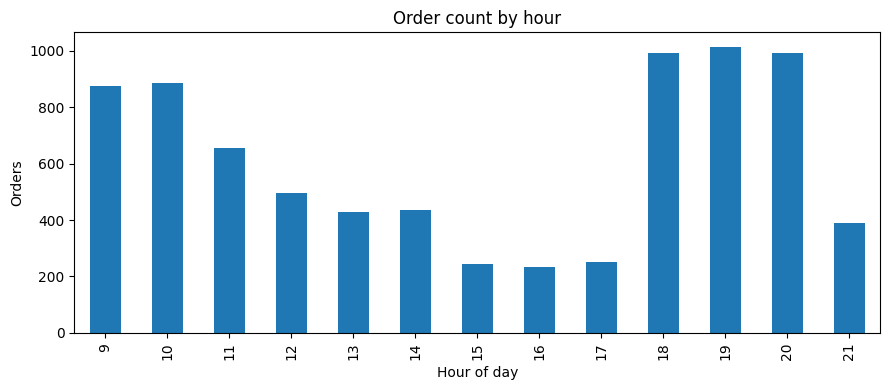

In [21]:
import numpy as np
import matplotlib.pyplot as plt

sales_df = sales_df.copy()
sales_df["system_date"] = pd.to_datetime(sales_df["system_date"], errors="coerce")

rng = np.random.default_rng(42)
time_blocks = [
    {"start": 9 * 3600, "end": 11 * 3600 + 30 * 60, "weight": 0.30},
    {"start": 11 * 3600 + 30 * 60, "end": 15 * 3600, "weight": 0.20},
    {"start": 15 * 3600, "end": 18 * 3600, "weight": 0.10},
    {"start": 18 * 3600, "end": 21 * 3600, "weight": 0.35},
    {"start": 21 * 3600, "end": 22 * 3600 + 1, "weight": 0.05},
 ]
base_weights = np.array([block["weight"] for block in time_blocks], dtype=float)
start_seconds = np.array([block["start"] for block in time_blocks], dtype=int)
end_seconds = np.array([block["end"] for block in time_blocks], dtype=int)

def adjust_weights(row):
    weights = base_weights.copy()
    if "is_weekend" in row and row["is_weekend"] == 1:
        weights[0] = max(weights[0] - 0.05, 0.0)
        weights[3] += 0.05
    if "order_type" in row and isinstance(row["order_type"], str):
        order_type = row["order_type"].strip().lower()
        if order_type == "delivery":
            shift = min(weights[0], 0.03)
            weights[0] -= shift
            weights[3] += shift
            lull_shift = min(weights[2], 0.02)
            weights[2] -= lull_shift
            weights[3] += lull_shift
    weights = np.clip(weights, 1e-6, None)
    return weights / weights.sum()

def generate_order_time(row):
    if pd.isna(row["system_date"]):
        return pd.NA, pd.NaT
    weights = adjust_weights(row)
    block_idx = rng.choice(len(time_blocks), p=weights)
    start = start_seconds[block_idx]
    end = end_seconds[block_idx]
    second_of_day = int(rng.integers(start, end))
    hours = second_of_day // 3600
    minutes = (second_of_day % 3600) // 60
    seconds = second_of_day % 60
    time_str = f"{hours:02d}:{minutes:02d}:{seconds:02d}"
    order_dt = row["system_date"] + pd.to_timedelta(second_of_day, unit="s")
    return time_str, order_dt

order_assignments = sales_df.apply(generate_order_time, axis=1, result_type="expand")
order_assignments.columns = ["order_time", "order_datetime"]
sales_df["order_time"] = order_assignments["order_time"].astype("string")
sales_df["order_datetime"] = pd.to_datetime(order_assignments["order_datetime"])

preview_cols = ["system_date", "order_time", "order_datetime"]
print(sales_df[preview_cols].head(15))

valid_mask = sales_df["order_datetime"].notna()
if valid_mask.any():
    min_time = sales_df.loc[valid_mask, "order_datetime"].dt.time.min()
    max_time = sales_df.loc[valid_mask, "order_datetime"].dt.time.max()
    print(f"Order time range: {min_time} – {max_time}")
    hour_counts = sales_df.loc[valid_mask, "order_datetime"].dt.hour.value_counts().sort_index()
    print(hour_counts)
    hour_counts.plot(kind="bar", figsize=(9, 4), title="Order count by hour")
    plt.xlabel("Hour of day")
    plt.ylabel("Orders")
    plt.tight_layout()
    plt.show()
else:
    print("No valid order_datetime values available for range check.")

In [22]:
sales_df.head(20)

,system_date,order_type,food_name,qty,gross_price,discount_rate,total_discount_price,total_price,discount_ratio_effective,day_of_week,...,year,is_month_start,is_month_end,week_of_month,is_holiday,holiday_name,is_pre_holiday,is_post_holiday,order_time,order_datetime
0,2020-01-10,delivery,Sweet Pasta 12,5,6624.60,0.260369,3083.27,3541.33,NaN,4,...,2020,0,0,2,1,Duruthu Full Moon Poya Day,0,0,19:57:49,2020-01-10 19:57:49
1,2020-01-10,takeaway,Sweet Roll 9,4,2077.09,0.248330,711.30,1365.79,NaN,4,...,2020,0,0,2,1,Duruthu Full Moon Poya Day,0,0,19:18:59,2020-01-10 19:18:59
2,2020-01-11,delivery,Item50,1,3963.95,0.022974,1461.42,2502.53,NaN,5,...,2020,0,0,2,0,<NA>,0,1,18:36:15,2020-01-11 18:36:15
3,2020-01-12,table,Crispy Pasta 12,1,1770.43,0.274482,17.70,1752.73,NaN,6,...,2020,0,0,2,0,<NA>,0,0,21:05:39,2020-01-12 21:05:39
4,2020-01-12,table,Deluxe Pizza,4,1334.02,0.226195,324.49,1009.53,NaN,6,...,2020,0,0,2,0,<NA>,0,0,20:09:08,2020-01-12 20:09:08
5,2020-01-13,takeaway,Crispy Pasta 12,2,251.19,0.000000,95.87,155.32,NaN,0,...,2020,0,0,2,0,<NA>,0,0,10:57:54,2020-01-13 10:57:54
6,2020-01-13,delivery,Herb Drink 9,1,1199.68,0.013986,400.40,799.28,NaN,0,...,2020,0,0,2,0,<NA>,0,0,13:15:04,2020-01-13 13:15:04
7,2020-01-13,delivery,Deluxe Dessert 12,2,1612.51,0.215225,365.65,1246.86,NaN,0,...,2020,0,0,2,0,<NA>,0,0,19:06:44,2020-01-13 19:06:44
8,2020-01-13,delivery,Herb Burger,1,2093.60,0.001593,626.86,1466.74,NaN,0,...,2020,0,0,2,0,<NA>,0,0,19:12:26,2020-01-13 19:12:26
9,2020-01-13,takeaway,Veggie Drink 12,8,9818.30,0.240464,1449.23,8369.07,NaN,0,...,2020,0,0,2,0,<NA>,0,0,14:22:46,2020-01-13 14:22:46


In [29]:
import requests

LATITUDE = 7.18076
LONGITUDE = 79.88410
SHOP_TIMEZONE = "Asia/Colombo"
ARCHIVE_BASE_URL = "https://archive-api.open-meteo.com/v1/archive"

sales_df = sales_df.copy()
sales_df = sales_df.drop(columns=["temp_avg", "rain_mm", "is_rainy"], errors="ignore")
order_dt = pd.to_datetime(sales_df["order_datetime"], errors="coerce")
if order_dt.isna().all():
    raise ValueError("All order_datetime values became NaT after conversion. Ensure synthetic order times are generated before fetching weather.")
if order_dt.dt.tz is None:
    order_dt = order_dt.dt.tz_localize(SHOP_TIMEZONE)
else:
    order_dt = order_dt.dt.tz_convert(SHOP_TIMEZONE)
sales_df["order_datetime"] = order_dt

valid_dt = order_dt.dropna()
if valid_dt.empty:
    raise ValueError("No valid order_datetime values available to align weather data.")

start_ts = valid_dt.min()
end_ts = valid_dt.max()
start_buffer = (start_ts - pd.Timedelta(days=1)).floor("h")
end_buffer = (end_ts + pd.Timedelta(days=1)).ceil("h")

weather_data_cache = globals().get("weather_data_cache", [])
weather_df = None
for cached_df in weather_data_cache:
    if cached_df["weather_dt"].min() <= start_buffer and cached_df["weather_dt"].max() >= end_buffer:
        weather_df = cached_df
        break

if weather_df is None:
    params = {
        "latitude": LATITUDE,
        "longitude": LONGITUDE,
        "start_date": start_buffer.date().isoformat(),
        "end_date": end_buffer.date().isoformat(),
        "hourly": ["temperature_2m", "precipitation"],
        "timezone": SHOP_TIMEZONE,
    }
    response = requests.get(ARCHIVE_BASE_URL, params=params, timeout=30)
    if response.status_code != 200:
        raise RuntimeError(f"Open-Meteo API request failed with status {response.status_code}: {response.text}")
    payload = response.json()
    if "hourly" not in payload or not all(key in payload["hourly"] for key in ["time", "temperature_2m", "precipitation"]):
        raise ValueError("Open-Meteo response missing required hourly data fields.")
    hourly_data = payload["hourly"]
    weather_times = pd.to_datetime(hourly_data["time"])
    weather_times = weather_times.tz_localize(SHOP_TIMEZONE, nonexistent="shift_forward", ambiguous="NaT")
    weather_df = pd.DataFrame({
        "weather_dt": weather_times,
        "temp_avg": hourly_data["temperature_2m"],
        "rain_mm": hourly_data["precipitation"],
    })
    weather_df["is_rainy"] = (weather_df["rain_mm"] > 0).astype("Int8")
    weather_data_cache = weather_data_cache + [weather_df]
    globals()["weather_data_cache"] = weather_data_cache

order_dt_hour = sales_df["order_datetime"].dt.floor("h")
weather_df = weather_df.drop_duplicates(subset="weather_dt")
merged = sales_df.assign(order_dt_hour=order_dt_hour).merge(
    weather_df, how="left", left_on="order_dt_hour", right_on="weather_dt"
 )
sales_df["temp_avg"] = merged["temp_avg"].astype("float64")
sales_df["rain_mm"] = merged["rain_mm"].astype("float64")
sales_df["is_rainy"] = merged["is_rainy"].fillna(pd.NA).astype("Int8")

preview_cols = ["order_datetime", "temp_avg", "rain_mm", "is_rainy"]
print(sales_df[preview_cols].head(15))
print()
print("Missing values per column:")
print(sales_df[preview_cols].isna().sum())
print()
print("Order datetime range:", valid_dt.min(), valid_dt.max())
print("Weather datetime range:", weather_df["weather_dt"].min(), weather_df["weather_dt"].max())
print()
rainy_rows = sales_df[sales_df["is_rainy"] == 1][["order_datetime", "temp_avg", "rain_mm"]].head(20)
if rainy_rows.empty:
    print("No rainy observations found in the current data range.")
else:
    print("Sample rainy observations:")
    print(rainy_rows)

              order_datetime  temp_avg  rain_mm  is_rainy
0  2020-01-10 19:57:49+05:30      27.6      0.0         0
1  2020-01-10 19:18:59+05:30      27.6      0.0         0
2  2020-01-11 18:36:15+05:30      27.7      0.0         0
3  2020-01-12 21:05:39+05:30      26.0      0.0         0
4  2020-01-12 20:09:08+05:30      26.7      0.0         0
5  2020-01-13 10:57:54+05:30      28.5      0.0         0
6  2020-01-13 13:15:04+05:30      30.7      0.0         0
7  2020-01-13 19:06:44+05:30      26.6      0.0         0
8  2020-01-13 19:12:26+05:30      26.6      0.0         0
9  2020-01-13 14:22:46+05:30      30.7      0.0         0
10 2020-01-13 09:13:49+05:30      27.3      0.0         0
11 2020-01-13 10:23:11+05:30      28.5      0.0         0
12 2020-01-13 18:49:49+05:30      27.1      0.0         0
13 2020-01-14 19:53:41+05:30      26.1      0.0         0
14 2020-01-14 11:44:15+05:30      29.1      0.0         0

Missing values per column:
order_datetime    0
temp_avg          0
rain

In [24]:
%pip install requests

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 64 kB 1.1 MB/s eta 0:00:011
     |████████████████████████████████| 131 kB 1.8 MB/s eta 0:00:01
     |████████████████████████████████| 159 kB 12.5 MB/s eta 0:00:01
     |████████████████████████████████| 71 kB 8.2 MB/s eta 0:00:011
     |████████████████████████████████| 209 kB 18.6 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [30]:
sales_df.head()

,system_date,order_type,food_name,qty,gross_price,discount_rate,total_discount_price,total_price,discount_ratio_effective,day_of_week,...,week_of_month,is_holiday,holiday_name,is_pre_holiday,is_post_holiday,order_time,order_datetime,temp_avg,rain_mm,is_rainy
0,2020-01-10,delivery,Sweet Pasta 12,5,6624.60,0.260369,3083.27,3541.33,NaN,4,...,2,1,Duruthu Full Moon Poya Day,0,0,19:57:49,2020-01-10 19:57:49+05:30,27.6,0.0,0
1,2020-01-10,takeaway,Sweet Roll 9,4,2077.09,0.248330,711.30,1365.79,NaN,4,...,2,1,Duruthu Full Moon Poya Day,0,0,19:18:59,2020-01-10 19:18:59+05:30,27.6,0.0,0
2,2020-01-11,delivery,Item50,1,3963.95,0.022974,1461.42,2502.53,NaN,5,...,2,0,<NA>,0,1,18:36:15,2020-01-11 18:36:15+05:30,27.7,0.0,0
3,2020-01-12,table,Crispy Pasta 12,1,1770.43,0.274482,17.70,1752.73,NaN,6,...,2,0,<NA>,0,0,21:05:39,2020-01-12 21:05:39+05:30,26.0,0.0,0
4,2020-01-12,table,Deluxe Pizza,4,1334.02,0.226195,324.49,1009.53,NaN,6,...,2,0,<NA>,0,0,20:09:08,2020-01-12 20:09:08+05:30,26.7,0.0,0


In [31]:
sales_df[sales_df["system_date"] == "2022-12-26"]

,system_date,order_type,food_name,qty,gross_price,discount_rate,total_discount_price,total_price,discount_ratio_effective,day_of_week,...,week_of_month,is_holiday,holiday_name,is_pre_holiday,is_post_holiday,order_time,order_datetime,temp_avg,rain_mm,is_rainy
3558,2022-12-26,takeaway,Classic Drink,1,311.66,0.009770,126.91,184.75,NaN,0,...,4,0,<NA>,0,1,18:48:28,2022-12-26 18:48:28+05:30,25.3,0.0,0
3559,2022-12-26,table,Deluxe Pizza,1,1062.95,0.000000,112.03,950.92,NaN,0,...,4,0,<NA>,0,1,11:04:24,2022-12-26 11:04:24+05:30,28.3,0.0,0
3560,2022-12-26,takeaway,Crispy Pasta 12,1,4546.81,0.203394,990.41,3556.40,NaN,0,...,4,0,<NA>,0,1,13:56:22,2022-12-26 13:56:22+05:30,27.7,0.2,1
3561,2022-12-26,table,Crispy Dessert 9,1,847.98,0.006686,153.49,694.49,NaN,0,...,4,0,<NA>,0,1,18:07:37,2022-12-26 18:07:37+05:30,25.3,0.0,0
3562,2022-12-26,delivery,Zesty Burger,1,1338.84,0.000000,471.29,867.55,NaN,0,...,4,0,<NA>,0,1,20:32:49,2022-12-26 20:32:49+05:30,24.3,0.0,0
3563,2022-12-26,delivery,Deluxe Pasta 12,4,3629.57,0.500000,2410.94,1218.63,NaN,0,...,4,0,<NA>,0,1,09:44:43,2022-12-26 09:44:43+05:30,26.1,0.2,1
3564,2022-12-26,delivery,Classic Roll,2,1521.10,0.000000,573.12,947.98,NaN,0,...,4,0,<NA>,0,1,20:15:14,2022-12-26 20:15:14+05:30,24.3,0.0,0
3565,2022-12-26,table,Herb Dessert 19,1,1804.33,0.000000,651.81,1152.52,NaN,0,...,4,0,<NA>,0,1,20:14:46,2022-12-26 20:14:46+05:30,24.3,0.0,0
3566,2022-12-26,delivery,Crispy Pasta 12,1,238.00,0.000000,71.58,166.42,NaN,0,...,4,0,<NA>,0,1,10:11:28,2022-12-26 10:11:28+05:30,27.1,0.1,1


In [32]:
hot_coffee_mask = sales_df["food_name"].str.contains("hot", case=False, na=False) & sales_df["food_name"].str.contains("coffee", case=False, na=False)
hot_coffee_rows = sales_df.loc[hot_coffee_mask]
hot_coffee_rows

,system_date,order_type,food_name,qty,gross_price,discount_rate,total_discount_price,total_price,discount_ratio_effective,day_of_week,...,week_of_month,is_holiday,holiday_name,is_pre_holiday,is_post_holiday,order_time,order_datetime,temp_avg,rain_mm,is_rainy


In [33]:
sorted_food_names = sorted(sales_df["food_name"].dropna().unique())
print(f"Total unique food items: {len(sorted_food_names)}")
sorted_food_names

Total unique food items: 87


['Classic Burger',
 'Classic Chicken',
 'Classic Chicken 19',
 'Classic Dessert',
 'Classic Drink',
 'Classic Pasta',
 'Classic Pasta 19',
 'Classic Pasta 22',
 'Classic Roll',
 'Classic Sandwich',
 'Crispy Burger',
 'Crispy Burger 22',
 'Crispy Chicken 22',
 'Crispy Dessert 9',
 'Crispy Drink',
 'Crispy Pasta 12',
 'Crispy Pasta 22',
 'Crispy Sandwich 12',
 'Crispy Sandwich 22',
 'Deluxe Chicken',
 'Deluxe Dessert 12',
 'Deluxe Dessert 19',
 'Deluxe Dessert 22',
 'Deluxe Drink',
 'Deluxe Pasta 12',
 'Deluxe Pizza',
 'Deluxe Pizza 19',
 'Deluxe Pizza 22',
 'Deluxe Roll',
 'Herb Burger',
 'Herb Burger 12',
 'Herb Chicken 12',
 'Herb Chicken 22',
 'Herb Dessert 19',
 'Herb Drink 9',
 'Herb Pasta 9',
 'Herb Pizza 9',
 'Herb Roll',
 'Herb Sandwich 9',
 'Item50',
 'Item724',
 'Spicy Burger',
 'Spicy Burger 12',
 'Spicy Burger 19',
 'Spicy Burger 22',
 'Spicy Burger 9',
 'Spicy Chicken 19',
 'Spicy Chicken 9',
 'Spicy Dessert',
 'Spicy Dessert 12',
 'Spicy Drink',
 'Spicy Drink 22',
 'Spicy 

In [35]:
from pathlib import Path
import numpy as np

HOLIDAY_FLAGS = ["is_holiday", "is_pre_holiday", "is_post_holiday"]
N_OPTIONS = np.array([30, 35, 28, 32, 40])
SHOP_TIMEZONE = "Asia/Colombo"

sales_df = sales_df.copy()
if not pd.api.types.is_datetime64_any_dtype(sales_df["system_date"]):
    sales_df["system_date"] = pd.to_datetime(sales_df["system_date"], errors="coerce")
if sales_df["system_date"].isna().any():
    raise ValueError("system_date contains NaT values. Clean the data before augmentation.")

holiday_mask = (sales_df["is_holiday"] == 1) | (sales_df["is_pre_holiday"] == 1) | (sales_df["is_post_holiday"] == 1)
if not holiday_mask.any():
    print("No holiday-related dates found; dataset left unchanged.")
    sales_df_aug = sales_df.sort_values("system_date").reset_index(drop=True)
else:
    rng = np.random.default_rng(42)
    templates = sales_df[sales_df["total_price"] > 0].copy()
    if templates.empty:
        raise ValueError("No valid template rows (total_price > 0) available for augmentation.")

    date_flags = (
        sales_df.loc[holiday_mask, ["system_date", *HOLIDAY_FLAGS]]
        .drop_duplicates(subset=["system_date"], keep="last")
        .set_index("system_date")
        .sort_index()
    )
    augmentation_records = []
    synthetic_chunks = []

    before_counts = sales_df.groupby("system_date").size()

    for current_date, flags in date_flags.iterrows():
        n_add = int(rng.choice(N_OPTIONS))
        sampled_idx = rng.choice(templates.index, size=n_add, replace=True)
        sampled = templates.loc[sampled_idx].copy().reset_index(drop=True)
        sampled["system_date"] = current_date
        for flag in HOLIDAY_FLAGS:
            sampled[flag] = int(flags.get(flag, 0))

        if "qty" in sampled.columns:
            sampled["qty"] = sampled["qty"].round().clip(lower=1).astype("int64")

        if "total_discount_price" in sampled.columns:
            sampled["total_discount_price"] = sampled["total_discount_price"].clip(lower=0)
        if "gross_price" in sampled.columns:
            sampled["gross_price"] = sampled["gross_price"].clip(lower=0)

        if {"gross_price", "total_discount_price"}.issubset(sampled.columns):
            sampled["total_price"] = (sampled["gross_price"] - sampled["total_discount_price"]).clip(lower=0)
            sampled["total_price"] = sampled[["total_price", "gross_price"]].min(axis=1)
        elif "total_price" in sampled.columns and "gross_price" in sampled.columns:
            sampled["total_price"] = sampled[["total_price", "gross_price"]].min(axis=1)

        if "order_time" in sampled.columns and "order_datetime" in sampled.columns:
            order_time_series = sampled["order_time"].astype("string")
            timestamp_strings = sampled["system_date"].dt.strftime("%Y-%m-%d") + " " + order_time_series.fillna("00:00:00")
            recalculated_dt = pd.to_datetime(timestamp_strings, format="%Y-%m-%d %H:%M:%S", errors="coerce")
            recalculated_dt = recalculated_dt.dt.tz_localize(SHOP_TIMEZONE, nonexistent="shift_forward", ambiguous="NaT")
            recalculated_dt = recalculated_dt.where(order_time_series.notna(), pd.NaT)
            sampled["order_datetime"] = recalculated_dt

        synthetic_chunks.append(sampled)
        augmentation_records.append({"system_date": current_date, "n_add": n_add})

    synthetic_additions = pd.concat(synthetic_chunks, ignore_index=True)
    sales_df_aug = (
        pd.concat([sales_df, synthetic_additions], ignore_index=True)
        .sort_values("system_date")
        .reset_index(drop=True)
    )

    after_counts = sales_df_aug.groupby("system_date").size()
    boosted_dates = pd.DataFrame(augmentation_records).sort_values("system_date")

    count_report = (
        pd.DataFrame({"before": before_counts, "after": after_counts})
        .loc[date_flags.index]
        .reset_index()
    )

    print("Augmentation summary (date -> n_add):")
    print(boosted_dates)
    print()
    print("Row counts before vs after for boosted dates:")
    print(count_report)
    print()
    price_issue_count = (sales_df_aug["total_price"] > sales_df_aug["gross_price"]).sum() if "total_price" in sales_df_aug.columns and "gross_price" in sales_df_aug.columns else 0
    qty_issue_count = (sales_df_aug["qty"] < 1).sum() if "qty" in sales_df_aug.columns else 0
    print(f"Rows where total_price > gross_price: {price_issue_count}")
    print(f"Rows where qty < 1: {qty_issue_count}")

project_root = Path.cwd()
if not (project_root / "data").is_dir():
    project_root = project_root.parent
output_dir = project_root / "data"
output_dir.mkdir(parents=True, exist_ok=True)
output_path = output_dir / "sales_with_history_2020_2025_augmented.csv"
sales_df_aug.to_csv(output_path, index=False)
print(f"Augmented dataset saved to: {output_path}")
sales_df = sales_df_aug.copy()
sales_df_aug

Augmentation summary (date -> n_add):
    system_date  n_add
0    2020-01-10     30
1    2020-01-11     35
2    2020-01-14     35
3    2020-01-15     30
4    2020-01-16     32
..          ...    ...
388  2025-09-04     40
389  2025-09-05     40
390  2025-09-06     28
391  2025-09-07     35
392  2025-09-08     28

[393 rows x 2 columns]

Row counts before vs after for boosted dates:
    system_date  before  after
0    2020-01-10       2     32
1    2020-01-11       1     36
2    2020-01-14       3     38
3    2020-01-15       1     31
4    2020-01-16       4     36
..          ...     ...    ...
388  2025-09-04       4     44
389  2025-09-05       5     45
390  2025-09-06       4     32
391  2025-09-07       3     38
392  2025-09-08       4     32

[393 rows x 3 columns]

Rows where total_price > gross_price: 0
Rows where qty < 1: 0
Augmented dataset saved to: /Users/vinushan/Documents/Y4S2/RP module/contextawareforecastingsys/data/sales_with_history_2020_2025_augmented.csv


,system_date,order_type,food_name,qty,gross_price,discount_rate,total_discount_price,total_price,discount_ratio_effective,day_of_week,...,week_of_month,is_holiday,holiday_name,is_pre_holiday,is_post_holiday,order_time,order_datetime,temp_avg,rain_mm,is_rainy
0,2020-01-10,delivery,Sweet Pasta 12,5,6624.60,0.260369,3083.27,3541.33,NaN,4,...,2,1,Duruthu Full Moon Poya Day,0,0,19:57:49,2020-01-10 19:57:49+05:30,27.6,0.0,0
1,2020-01-10,takeaway,Spicy Burger,2,1799.79,0.275847,663.90,1135.89,NaN,2,...,2,1,<NA>,0,0,16:57:33,2020-01-10 16:57:33+05:30,26.4,2.4,1
2,2020-01-10,delivery,Deluxe Pizza 19,5,1159.29,0.248521,130.85,1028.44,NaN,1,...,1,1,<NA>,0,0,12:25:37,2020-01-10 12:25:37+05:30,30.1,0.2,1
3,2020-01-10,delivery,Crispy Pasta 12,3,1760.22,0.028765,451.44,1308.78,NaN,4,...,3,1,<NA>,0,0,09:26:25,2020-01-10 09:26:25+05:30,29.4,0.1,1
4,2020-01-10,delivery,Crispy Dessert 9,3,1063.20,0.007932,247.19,816.01,NaN,6,...,1,1,<NA>,0,0,19:26:36,2020-01-10 19:26:36+05:30,25.0,1.3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20854,2025-09-08,delivery,Crispy Chicken 22,1,1057.87,0.026040,233.05,824.82,NaN,2,...,2,0,<NA>,0,1,12:58:13,2025-09-08 12:58:13+05:30,29.2,0.1,1
20855,2025-09-08,delivery,Veggie Drink 9,1,2187.79,0.008518,308.81,1878.98,NaN,2,...,2,0,<NA>,0,1,18:27:38,2025-09-08 18:27:38+05:30,28.1,0.0,0
20856,2025-09-08,table,Crispy Drink,2,3174.97,0.261349,1087.13,2087.84,NaN,3,...,2,0,<NA>,0,1,18:08:04,2025-09-08 18:08:04+05:30,27.4,0.0,0
20857,2025-09-09,table,Spicy Chicken 19,1,4150.29,0.000000,1719.79,1975.52,0.414378,1,...,2,0,<NA>,0,0,09:06:42,2025-09-09 09:06:42+05:30,29.3,0.2,1


In [40]:
sales_df[sales_df["system_date"] == "2022-12-25"]

,system_date,order_type,food_name,qty,gross_price,discount_rate,total_discount_price,total_price,discount_ratio_effective,day_of_week,...,week_of_month,is_holiday,holiday_name,is_pre_holiday,is_post_holiday,order_time,order_datetime,temp_avg,rain_mm,is_rainy
10279,2022-12-25,table,Veggie Roll,4,1753.94,0.000000,215.00,1538.94,0.122581,6,...,4,1,Christmas Day,0,0,15:22:12,2022-12-25 15:22:12+05:30,23.6,2.5,1
10280,2022-12-25,delivery,Sweet Pasta 19,2,1278.19,0.036397,151.03,1127.16,NaN,6,...,4,1,Christmas Day,0,0,11:39:34,2022-12-25 11:39:34+05:30,24.8,1.5,1
10281,2022-12-25,takeaway,Classic Drink,2,332.86,0.000000,101.20,231.66,NaN,6,...,4,1,Christmas Day,0,0,20:13:10,2022-12-25 20:13:10+05:30,23.7,0.4,1
10282,2022-12-25,table,Deluxe Roll,3,496.82,0.000000,30.87,465.95,NaN,6,...,4,1,Christmas Day,0,0,09:35:57,2022-12-25 09:35:57+05:30,24.4,4.8,1
10283,2022-12-25,delivery,Spicy Burger 19,3,2393.49,0.000000,697.09,1696.40,NaN,6,...,4,1,Christmas Day,0,0,13:16:36,2022-12-25 13:16:36+05:30,24.1,3.7,1
10284,2022-12-25,table,Veggie Drink 19,3,7749.19,0.000000,2486.26,5262.93,NaN,6,...,4,1,Christmas Day,0,0,14:06:03,2022-12-25 14:06:03+05:30,24.3,1.4,1
10285,2022-12-25,table,Spicy Drink 22,2,1452.29,0.282471,546.07,906.22,NaN,6,...,4,1,Christmas Day,0,0,09:46:25,2022-12-25 09:46:25+05:30,24.4,4.8,1
10286,2022-12-25,takeaway,Deluxe Pizza 19,5,4647.21,0.010209,1495.44,3151.77,NaN,6,...,4,1,Christmas Day,0,0,19:31:01,2022-12-25 19:31:01+05:30,23.3,0.3,1
10287,2022-12-25,table,Herb Drink 9,4,2106.45,0.000000,324.62,1781.83,NaN,6,...,4,1,Christmas Day,0,0,12:32:54,2022-12-25 12:32:54+05:30,24.5,1.8,1
10288,2022-12-25,delivery,Herb Drink 9,1,12907.16,0.000000,1953.21,10953.95,NaN,6,...,4,1,Christmas Day,0,0,19:18:25,2022-12-25 19:18:25+05:30,23.3,0.3,1


In [39]:
from pathlib import Path
import numpy as np
import pandas as pd
import requests

import holidays

LATITUDE = 7.18076
LONGITUDE = 79.88410
SHOP_TIMEZONE = "Asia/Colombo"
ARCHIVE_BASE_URL = "https://archive-api.open-meteo.com/v1/archive"

sales_df = sales_df.copy()
sales_df["system_date"] = pd.to_datetime(sales_df["system_date"], errors="coerce")
if sales_df["system_date"].isna().any():
    raise ValueError("system_date contains NaT values after conversion; clean the data before recomputing context.")

# Rebuild calendar context fields.
sales_df["day_of_week"] = sales_df["system_date"].dt.dayofweek.astype("int8")
sales_df["is_weekend"] = sales_df["day_of_week"].isin([5, 6]).astype("int8")
sales_df["month"] = sales_df["system_date"].dt.month.astype("int8")
sales_df["year"] = sales_df["system_date"].dt.year.astype("int32")
sales_df["is_month_start"] = sales_df["system_date"].dt.is_month_start.fillna(False).astype("int8")
sales_df["is_month_end"] = sales_df["system_date"].dt.is_month_end.fillna(False).astype("int8")
day_values = sales_df["system_date"].dt.day
sales_df["week_of_month"] = ((day_values - 1) // 7 + 1).astype("Int64")

# Refresh Sri Lanka holiday context.
years = sorted(sales_df["system_date"].dt.year.unique())
lk_holidays = holidays.country_holidays(country="LK", years=years)

def compute_holiday_context(ts):
    date_key = ts.date()
    is_holiday = int(date_key in lk_holidays)
    holiday_name = lk_holidays.get(date_key)
    next_day = (ts + pd.Timedelta(days=1)).date()
    prev_day = (ts - pd.Timedelta(days=1)).date()
    is_pre_holiday = int(next_day in lk_holidays)
    is_post_holiday = int(prev_day in lk_holidays)
    return is_holiday, (holiday_name if holiday_name is not None else pd.NA), is_pre_holiday, is_post_holiday

holiday_df = pd.DataFrame(
    sales_df["system_date"].apply(compute_holiday_context).tolist(),
    columns=["is_holiday", "holiday_name", "is_pre_holiday", "is_post_holiday"],
    index=sales_df.index,
 )
sales_df["is_holiday"] = holiday_df["is_holiday"].astype("Int8")
sales_df["holiday_name"] = holiday_df["holiday_name"].astype("string")
sales_df["is_pre_holiday"] = holiday_df["is_pre_holiday"].astype("Int8")
sales_df["is_post_holiday"] = holiday_df["is_post_holiday"].astype("Int8")

# Ensure synthetic order time coverage.
time_blocks = [
    {"start": 9 * 3600, "end": 11 * 3600 + 30 * 60, "weight": 0.30},
    {"start": 11 * 3600 + 30 * 60, "end": 15 * 3600, "weight": 0.20},
    {"start": 15 * 3600, "end": 18 * 3600, "weight": 0.10},
    {"start": 18 * 3600, "end": 21 * 3600, "weight": 0.35},
    {"start": 21 * 3600, "end": 22 * 3600 + 1, "weight": 0.05},
 ]
base_weights = np.array([block["weight"] for block in time_blocks], dtype=float)
start_seconds = np.array([block["start"] for block in time_blocks], dtype=int)
end_seconds = np.array([block["end"] for block in time_blocks], dtype=int)

def adjust_weights(row):
    weights = base_weights.copy()
    if row.get("is_weekend", 0) == 1:
        weights[0] = max(weights[0] - 0.05, 0.0)
        weights[3] += 0.05
    order_type = row.get("order_type")
    if isinstance(order_type, str) and order_type.strip().lower() == "delivery":
        shift = min(weights[0], 0.03)
        weights[0] -= shift
        weights[3] += shift
        lull_shift = min(weights[2], 0.02)
        weights[2] -= lull_shift
        weights[3] += lull_shift
    weights = np.clip(weights, 1e-6, None)
    return weights / weights.sum()

def synthesize_order_time(row, rng):
    weights = adjust_weights(row)
    block_idx = rng.choice(len(time_blocks), p=weights)
    second_of_day = int(rng.integers(start_seconds[block_idx], end_seconds[block_idx]))
    hours = second_of_day // 3600
    minutes = (second_of_day % 3600) // 60
    seconds = second_of_day % 60
    time_str = f"{hours:02d}:{minutes:02d}:{seconds:02d}"
    order_dt = row["system_date"] + pd.to_timedelta(second_of_day, unit="s")
    return time_str, order_dt

order_time_str = sales_df.get("order_time")
if order_time_str is None:
    order_time_str = pd.Series(pd.NA, index=sales_df.index, dtype="string")
else:
    order_time_str = order_time_str.astype("string").str.strip().replace({"": pd.NA})

timestamp_strings = sales_df["system_date"].dt.strftime("%Y-%m-%d") + " " + order_time_str.fillna("00:00:00")
order_dt = pd.to_datetime(timestamp_strings, format="%Y-%m-%d %H:%M:%S", errors="coerce")
order_dt = order_dt.where(order_time_str.notna(), pd.NaT)

needs_synthesis = order_time_str.isna() | order_dt.isna()
if needs_synthesis.any():
    rng = np.random.default_rng(42)
    synthesized = sales_df.loc[needs_synthesis].apply(
        lambda row: synthesize_order_time(row, rng), axis=1, result_type="expand"
)
    synthesized.columns = ["order_time_fill", "order_datetime_fill"]
    order_time_str.loc[needs_synthesis] = synthesized["order_time_fill"].astype("string")
    order_dt.loc[needs_synthesis] = synthesized["order_datetime_fill"]

sales_df["order_time"] = order_time_str.astype("string")
sales_df["order_datetime"] = pd.to_datetime(order_dt)

# Refresh weather context using Open-Meteo archive API.
sales_df = sales_df.drop(columns=["temp_avg", "rain_mm", "is_rainy"], errors="ignore")
order_dt = pd.to_datetime(sales_df["order_datetime"], errors="coerce")
if order_dt.isna().any():
    raise ValueError("order_datetime contains NaT values after synthesis; verify order time generation.")
if order_dt.dt.tz is None:
    order_dt = order_dt.dt.tz_localize(SHOP_TIMEZONE, nonexistent="shift_forward", ambiguous="NaT")
else:
    order_dt = order_dt.dt.tz_convert(SHOP_TIMEZONE)
sales_df["order_datetime"] = order_dt

start_ts = order_dt.min()
end_ts = order_dt.max()
start_buffer = (start_ts - pd.Timedelta(days=1)).floor("h")
end_buffer = (end_ts + pd.Timedelta(days=1)).ceil("h")

weather_data_cache = globals().get("weather_data_cache", [])
weather_df = None
for cached_df in weather_data_cache:
    if cached_df["weather_dt"].min() <= start_buffer and cached_df["weather_dt"].max() >= end_buffer:
        weather_df = cached_df
        break

if weather_df is None:
    params = {
        "latitude": LATITUDE,
        "longitude": LONGITUDE,
        "start_date": start_buffer.date().isoformat(),
        "end_date": end_buffer.date().isoformat(),
        "hourly": ["temperature_2m", "precipitation"],
        "timezone": SHOP_TIMEZONE,
    }
    response = requests.get(ARCHIVE_BASE_URL, params=params, timeout=30)
    if response.status_code != 200:
        raise RuntimeError(f"Open-Meteo API request failed with status {response.status_code}: {response.text}")
    payload = response.json()
    hourly_payload = payload.get("hourly", {})
    required_keys = {"time", "temperature_2m", "precipitation"}
    if not required_keys.issubset(hourly_payload):
        missing = required_keys - set(hourly_payload)
        raise ValueError(f"Open-Meteo response missing required hourly fields: {sorted(missing)}")
    weather_times = pd.to_datetime(hourly_payload["time"])
    weather_times = weather_times.tz_localize(SHOP_TIMEZONE, nonexistent="shift_forward", ambiguous="NaT")
    weather_df = pd.DataFrame({
        "weather_dt": weather_times,
        "temp_avg": hourly_payload["temperature_2m"],
        "rain_mm": hourly_payload["precipitation"],
    })
    weather_df["is_rainy"] = (weather_df["rain_mm"] > 0).astype("Int8")
    weather_data_cache = weather_data_cache + [weather_df]
    globals()["weather_data_cache"] = weather_data_cache

order_dt_hour = sales_df["order_datetime"].dt.floor("h")
weather_df = weather_df.drop_duplicates(subset="weather_dt")
merged = sales_df.assign(order_dt_hour=order_dt_hour).merge(
    weather_df, how="left", left_on="order_dt_hour", right_on="weather_dt"
)
sales_df["temp_avg"] = merged["temp_avg"].astype("float64")
sales_df["rain_mm"] = merged["rain_mm"].astype("float64")
sales_df["is_rainy"] = merged["is_rainy"].fillna(pd.NA).astype("Int8")

# Quick completeness checks for context fields.
context_columns = [
    "day_of_week",
    "is_weekend",
    "month",
    "year",
    "is_month_start",
    "is_month_end",
    "week_of_month",
    "is_holiday",
    "is_pre_holiday",
    "is_post_holiday",
    "order_time",
    "order_datetime",
    "temp_avg",
    "rain_mm",
    "is_rainy",
]
missing_summary = sales_df[context_columns].isna().sum()
print("Missing values across context fields:")
print(missing_summary)

project_root = Path.cwd()
if not (project_root / "data").is_dir():
    project_root = project_root.parent
output_path = project_root / "data" / "sales_with_history_2020_2025_augmented.csv"
sales_df.to_csv(output_path, index=False)
print(f"Recomputed context saved to: {output_path}")

sales_df.head()

Missing values across context fields:
day_of_week        0
is_weekend         0
month              0
year               0
is_month_start     0
is_month_end       0
week_of_month      0
is_holiday         0
is_pre_holiday     0
is_post_holiday    0
order_time         0
order_datetime     0
temp_avg           0
rain_mm            0
is_rainy           0
dtype: int64
Recomputed context saved to: /Users/vinushan/Documents/Y4S2/RP module/contextawareforecastingsys/data/sales_with_history_2020_2025_augmented.csv


,system_date,order_type,food_name,qty,gross_price,discount_rate,total_discount_price,total_price,discount_ratio_effective,day_of_week,...,week_of_month,is_holiday,holiday_name,is_pre_holiday,is_post_holiday,order_time,order_datetime,temp_avg,rain_mm,is_rainy
0,2020-01-10,delivery,Sweet Pasta 12,5,6624.60,0.260369,3083.27,3541.33,NaN,4,...,2,1,Duruthu Full Moon Poya Day,0,0,19:57:49,2020-01-10 19:57:49+05:30,27.6,0.0,0
1,2020-01-10,takeaway,Spicy Burger,2,1799.79,0.275847,663.90,1135.89,NaN,4,...,2,1,Duruthu Full Moon Poya Day,0,0,16:57:33,2020-01-10 16:57:33+05:30,28.9,0.0,0
2,2020-01-10,delivery,Deluxe Pizza 19,5,1159.29,0.248521,130.85,1028.44,NaN,4,...,2,1,Duruthu Full Moon Poya Day,0,0,12:25:37,2020-01-10 12:25:37+05:30,30.4,0.0,0
3,2020-01-10,delivery,Crispy Pasta 12,3,1760.22,0.028765,451.44,1308.78,NaN,4,...,2,1,Duruthu Full Moon Poya Day,0,0,09:26:25,2020-01-10 09:26:25+05:30,26.9,0.0,0
4,2020-01-10,delivery,Crispy Dessert 9,3,1063.20,0.007932,247.19,816.01,NaN,4,...,2,1,Duruthu Full Moon Poya Day,0,0,19:26:36,2020-01-10 19:26:36+05:30,27.6,0.0,0


In [43]:
from pathlib import Path
import pandas as pd
from pandas.api.types import is_numeric_dtype

df = sales_df.copy()

cleaning_notes = []
quality_flags = {}

# Standardize string columns for consistent comparisons.
string_like = df.select_dtypes(include=["object", "string"]).columns
for col in string_like:
    df[col] = df[col].astype("string").str.strip()

# Drop fully duplicated rows.
duplicate_mask = df.duplicated(keep="first")
duplicate_count = int(duplicate_mask.sum())
if duplicate_count:
    df = df[~duplicate_mask].reset_index(drop=True)
    cleaning_notes.append(f"Dropped {duplicate_count} exact duplicate rows.")
quality_flags["duplicates_removed"] = duplicate_count

# Enforce positive quantities.
if "qty" in df.columns:
    df["qty"] = pd.to_numeric(df["qty"], errors="coerce")
    invalid_qty = df["qty"].isna() | (df["qty"] < 1)
    if invalid_qty.any():
        count_qty = int(invalid_qty.sum())
        df.loc[invalid_qty, "qty"] = df.loc[invalid_qty, "qty"].fillna(1).round().clip(lower=1).astype("int64")
        cleaning_notes.append(f"Adjusted {count_qty} rows with invalid qty values.")
        quality_flags["qty_adjusted"] = count_qty
    df["qty"] = df["qty"].round().clip(lower=1).astype("int64")

# Ensure pricing columns are numeric and coherent.
price_cols = [col for col in ["gross_price", "total_price", "total_discount_price"] if col in df.columns]
for col in price_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

if {"gross_price", "total_discount_price"}.issubset(df.columns):
    discount_nan = df["total_discount_price"].isna().sum()
    if discount_nan:
        df["total_discount_price"] = df["total_discount_price"].fillna(0.0)
        cleaning_notes.append(f"Filled {int(discount_nan)} missing total_discount_price values with 0.")
if "gross_price" in df.columns:
    negative_gross = (df["gross_price"] < 0).sum()
    if negative_gross:
        df.loc[df["gross_price"] < 0, "gross_price"] = 0.0
        cleaning_notes.append(f"Clipped {int(negative_gross)} negative gross_price values to 0.")
if "total_discount_price" in df.columns:
    df["total_discount_price"] = df["total_discount_price"].clip(lower=0.0)
if "gross_price" in df.columns and "total_discount_price" in df.columns:
    df["total_price"] = (df["gross_price"] - df["total_discount_price"]).clip(lower=0.0)
    df["total_discount_price"] = df[["total_discount_price", "gross_price"]].min(axis=1)
if "total_price" in df.columns and "gross_price" in df.columns:
    too_high_total = (df["total_price"] > df["gross_price"]).sum()
    if too_high_total:
        df.loc[df["total_price"] > df["gross_price"], "total_price"] = df.loc[df["total_price"] > df["gross_price"], "gross_price"]
        cleaning_notes.append(f"Aligned {int(too_high_total)} rows where total_price exceeded gross_price.")

# Flag rows with missing critical fields post-cleaning.
critical_columns = [col for col in ["system_date", "order_time", "order_datetime", "gross_price", "total_price", "qty"] if col in df.columns]
missing_after_clean = df[critical_columns].isna().sum()
quality_flags["missing_after_clean"] = missing_after_clean.to_dict()

# Detect anomalous price-to-quantity ratios.
if {"total_price", "qty"}.issubset(df.columns):
    price_per_qty = df["total_price"] / df["qty"].replace(0, pd.NA)
    high_unit_price = price_per_qty > price_per_qty.quantile(0.999)
    low_unit_price = price_per_qty < price_per_qty.quantile(0.001)
    quality_flags["unit_price_outliers_high"] = int(high_unit_price.sum())
    quality_flags["unit_price_outliers_low"] = int(low_unit_price.sum())

# Ensure datetime ordering context remains valid.
if "order_datetime" in df.columns:
    datetime_na = df["order_datetime"].isna().sum()
    if datetime_na:
        cleaning_notes.append(f"Found {int(datetime_na)} rows without order_datetime; please review.")

sales_df = df

project_root = Path.cwd()
if not (project_root / "data").is_dir():
    project_root = project_root.parent
clean_output_path = project_root / "data" / "sales_with_history_2020_2025_augmented_clean.csv"
sales_df.to_csv(clean_output_path, index=False)
print(f"Cleaned dataset saved to: {clean_output_path}")

sales_df.head()

Cleaned dataset saved to: /Users/vinushan/Documents/Y4S2/RP module/contextawareforecastingsys/data/sales_with_history_2020_2025_augmented_clean.csv


,system_date,order_type,food_name,qty,gross_price,discount_rate,total_discount_price,total_price,discount_ratio_effective,day_of_week,...,week_of_month,is_holiday,holiday_name,is_pre_holiday,is_post_holiday,order_time,order_datetime,temp_avg,rain_mm,is_rainy
0,2020-01-10,delivery,Sweet Pasta 12,5,6624.60,0.260369,3083.27,3541.33,NaN,4,...,2,1,Duruthu Full Moon Poya Day,0,0,19:57:49,2020-01-10 19:57:49+05:30,27.6,0.0,0
1,2020-01-10,takeaway,Spicy Burger,2,1799.79,0.275847,663.90,1135.89,NaN,4,...,2,1,Duruthu Full Moon Poya Day,0,0,16:57:33,2020-01-10 16:57:33+05:30,28.9,0.0,0
2,2020-01-10,delivery,Deluxe Pizza 19,5,1159.29,0.248521,130.85,1028.44,NaN,4,...,2,1,Duruthu Full Moon Poya Day,0,0,12:25:37,2020-01-10 12:25:37+05:30,30.4,0.0,0
3,2020-01-10,delivery,Crispy Pasta 12,3,1760.22,0.028765,451.44,1308.78,NaN,4,...,2,1,Duruthu Full Moon Poya Day,0,0,09:26:25,2020-01-10 09:26:25+05:30,26.9,0.0,0
4,2020-01-10,delivery,Crispy Dessert 9,3,1063.20,0.007932,247.19,816.01,NaN,4,...,2,1,Duruthu Full Moon Poya Day,0,0,19:26:36,2020-01-10 19:26:36+05:30,27.6,0.0,0


In [44]:
print("Cleaning notes:")
for note in cleaning_notes:
    print(f"- {note}")
if not cleaning_notes:
    print("- No corrective actions were required.")
print()
print("Quality flags:")
for key, value in quality_flags.items():
    print(f"- {key}: {value}")
print()
critical_issues = {k: v for k, v in quality_flags.items() if k.startswith("missing") and any(val > 0 for val in v.values())}
if critical_issues:
    print("Critical fields still contain missing data; review required.")
else:
    print("Critical field checks passed with no missing values.")

Cleaning notes:
- No corrective actions were required.

Quality flags:
- duplicates_removed: 0
- missing_after_clean: {'system_date': 0, 'order_time': 0, 'order_datetime': 0, 'gross_price': 0, 'total_price': 0, 'qty': 0}
- unit_price_outliers_high: 18
- unit_price_outliers_low: 20

Critical field checks passed with no missing values.


In [45]:
sales_df.shape

(20829, 25)